# label smoothing analysis 

Here, the pretrained CNNs, in particular the 5 conditions: DEFAULT, COLOR, SCALE, SHAPE, and ALL are analyed in terms of their visual biases. For that purpose the RSA scores between input and representations are calculated and the CNNs' internal representations are visualized with similarity matrices and T-SNE plots. 

In [1]:
import pickle
import matplotlib.pyplot as plt
from utils.tsne import calc_tsne, plot_tsne
from utils.vision_analysis import save_rsa_cnns, get_vision_module_similarity_matrices

### RSA between attributes and CNN features

In [2]:
## these scores have been caculated and are stored in 'results/rsa_attributes_CNNfeatures/'
# save_rsa_cnns(vs=4, ml=3, n_examples=50, mode='basic')

file = 'results/rsa_attributes_CNNfeatures/basic_50examples.pkl'
RSA = pickle.load( open( file, 'rb'))

for key in RSA.keys(): 
    print(key, RSA[key])

default {'all': [0.438870612996162], 'color': [0.6333163398302539], 'scale': [0.10135354736413493], 'shape': [0.056057291788818416]}
color {'all': [0.4371852028890289], 'color': [0.7497654051131152], 'scale': [0.019303787269701608], 'shape': [0.016602184541087313]}
scale {'all': [0.4369548858804469], 'color': [0.019147163846487777], 'scale': [0.7497613302751934], 'shape': [0.01512331119018707]}
shape {'all': [0.4416922230108956], 'color': [0.020917189716185523], 'scale': [0.024535821942725067], 'shape': [0.7482684627503727]}
all {'all': [0.6750529221639165], 'color': [0.43966167408441914], 'scale': [0.3189788313103229], 'shape': [0.42371238965052826]}


### similarity matrices 

In [3]:
cnn_keys = ['default0-0', 'color0-6', 'shape0-6', 'scale0-6' ,'all0-8']

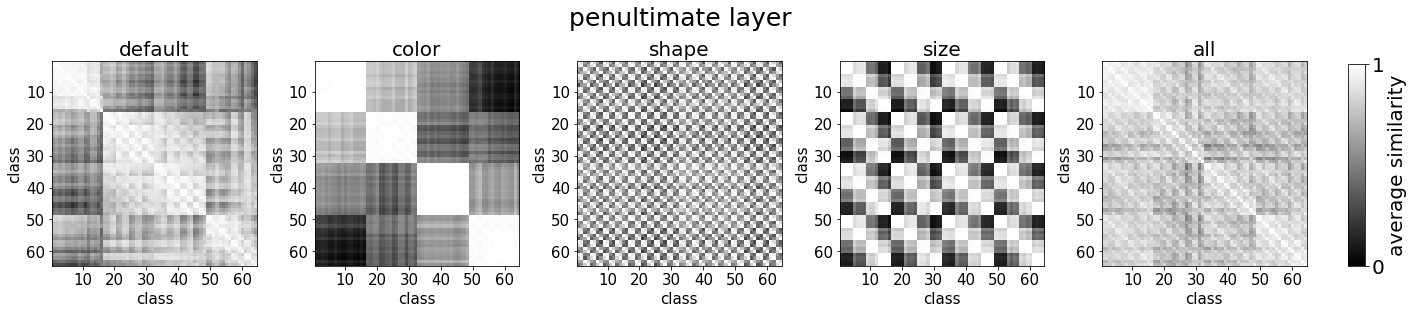

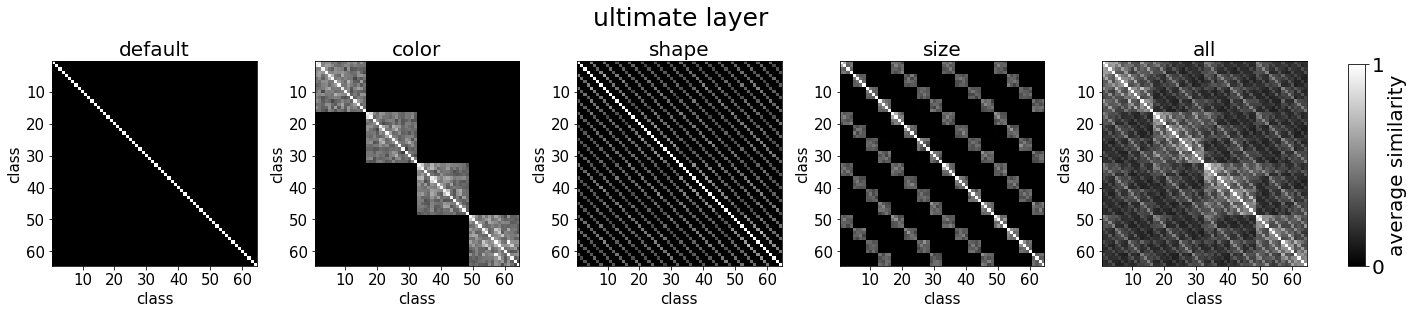

In [4]:
for l, layer in enumerate([0,1]):
    SMs = get_vision_module_similarity_matrices(cnn_keys, n_examples=100, layer=layer)
    fig, axes = plt.subplots(1,len(cnn_keys),figsize=(23,4))
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(SMs[i], vmin=0., vmax=1., cmap='gray')
        ax.set_xlabel('class', fontsize=15)
        ax.set_ylabel('class', fontsize=15)
        ax.set_yticks([9,19,29,39,49,59])
        ax.set_yticklabels([10,20,30,40,50,60], fontsize=15)
        ax.set_xticks([9,19,29,39,49,59])
        ax.set_xticklabels([10,20,30,40,50,60], fontsize=15)
        if 'scale' in cnn_keys[i]:
            title = 'size'
        else: 
            title = cnn_keys[i][:-3]
        ax.set_title(title, fontsize=20)

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar = fig.add_axes([0.82, 0.18, 0.01, 0.7])
    cbar.tick_params(labelsize=20) 
    cbar.set_label('average similarity')
    cbarplot = fig.colorbar(im, cax=cbar, ticks=[0,1])
    cbarplot.set_label('average similarity', fontsize=20)
    plt.suptitle(['penultimate layer', 'ultimate layer'][l], fontsize=25, x=0.417, y=1.08)
    plt.show()

### T-SNE analysis

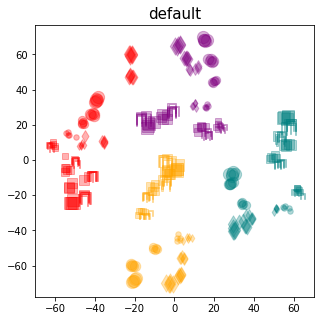

In [12]:
tsne_default = calc_tsne('default0-0', verbose=0, perplexity=100)
plot_tsne(tsne_default, points_per_class=5, title='default')

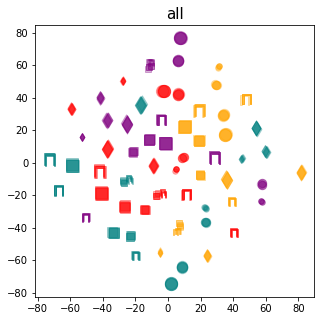

In [44]:
tsne_all = calc_tsne('all0-8', verbose=0)
plot_tsne(tsne_all, points_per_class=5, title='all')

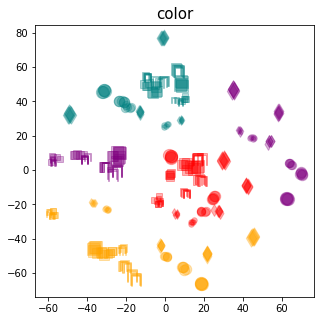

In [49]:
tsne_color = calc_tsne('color0-6', verbose=0)
plot_tsne(tsne_color, points_per_class=5, title='color')

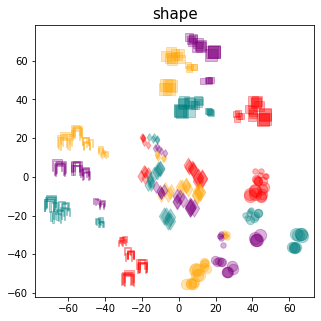

In [46]:
tsne_shape = calc_tsne('shape0-6', verbose=0)
plot_tsne(tsne_shape, points_per_class=5, title='shape')

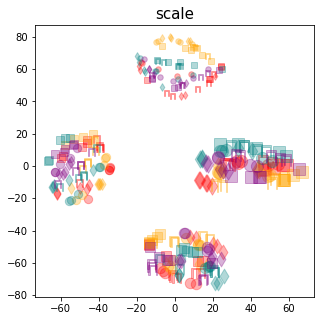

In [47]:
tsne_scale = calc_tsne('scale0-6', verbose=0)
plot_tsne(tsne_scale, points_per_class=5, title='scale')